In [81]:
import warnings
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import statsmodels

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns 

warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [99]:
df = df.drop(columns=['id'])
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [100]:
# df = df.loc[df['condition']>=3]
df = df.loc[df['waterfront']==0]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930


# drop price outliers

In [101]:
df = df.loc[df['price']<3000000]
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930


In [102]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

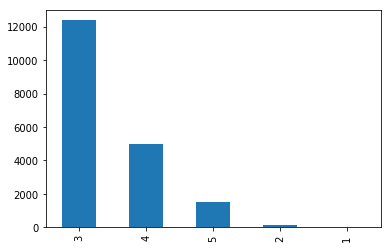

In [103]:
df.condition.value_counts().plot('bar')

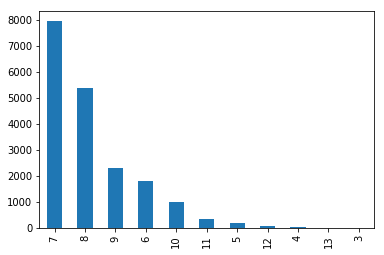

In [104]:
df.grade.value_counts().plot("bar")

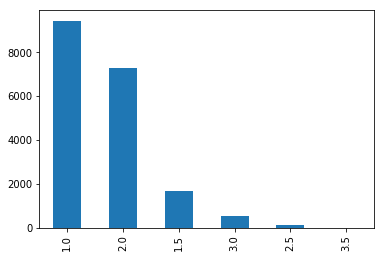

In [105]:
df.floors.value_counts().plot('bar')

# What features could be categorical? 
* waterfront - 1 and 0 translate to yes and no
* view - 1 and 0 translate to yes and no
* zipcode - there are numbers, but the numbers don't have order with meaning
* condition - 2 is actually greater than 1, the numbers have order, the order has meaning - discrete
* grade - the numbers have order the order has meaning - discrete
* bedrooms - the numbers have order, the order has meaning - discrete
* bathrooms - '' 
* floors - '' - more categorical than the rest

# How to treat condition?

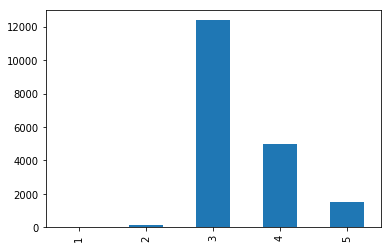

In [106]:
df.condition.value_counts().sort_index().plot('bar')
plt.show()

# how are prices across condition? 

In [107]:
df.groupby('condition').agg('mean')['price']

condition
1    339789.583333
2    317873.768212
3    529674.956279
4    508376.577591
5    601430.297787
Name: price, dtype: float64

In [108]:
df.groupby('condition').agg('std')['price']

condition
1    288629.229582
2    174003.974012
3    312900.490082
4    308545.229044
5    377972.161337
Name: price, dtype: float64

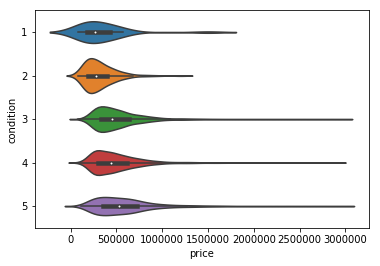

In [109]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

In [110]:
df['condition3'] = df.condition.apply(lambda x: 1 if x >=3 else 0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition3
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,1


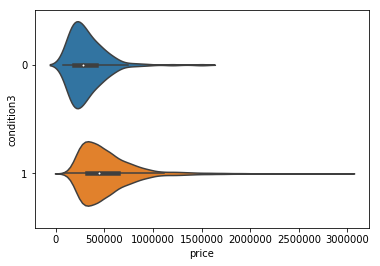

In [112]:
sns.violinplot(x='price', y='condition3', data=df, orient='h')
plt.show()

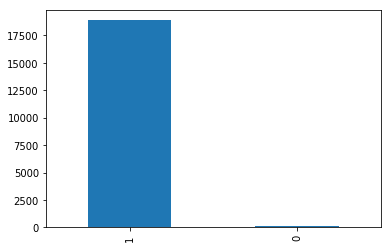

In [113]:
df.condition3.value_counts().plot('bar')

In [114]:
# Ho: mu1 = mu2
# Ha: mu1 != mu2
res = statsmodels.stats.multicomp.pairwise_tukeyhsd(df['price'], df['condition'])

print(res)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
group1 group2   meandiff  p-adj     lower        upper    reject
----------------------------------------------------------------
     1      2 -21915.8151    0.9 -211640.6388 167809.0086  False
     1      3 189885.3729 0.0275   13478.9607 366291.7852   True
     1      4 168586.9943 0.0699    -8070.461 345244.4495  False
     1      5 261640.7145  0.001   83992.3956 439289.0333   True
     2      3 211801.1881  0.001  141113.3717 282489.0044   True
     2      4 190502.8094  0.001  119190.8076 261814.8112   True
     2      5 283556.5296  0.001   209824.106 357288.9531   True
     3      4 -21298.3787  0.001  -35759.1932  -6837.5641   True
     3      5  71755.3415  0.001   48087.1384  95423.5446   True
     4      5  93053.7202  0.001    67581.813 118525.6274   True
----------------------------------------------------------------


In [115]:
ols = sm.OLS(df['price'], df['condition'])
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                          4.775e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        13:49:34   Log-Likelihood:                     -2.6900e+05
No. Observations:               19047   AIC:                                  5.380e+05
Df Residuals:                   19046   BIC:                                  5.380e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
condition   1.501e+05    686.961    218.512      0.000    1.49e+05    1.51e+05
==============================================================================
Omnibus:                     8919.494   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65679.615
Skew:                           2.122   Prob(JB):                         0.00
Kurtosis:                      11.046   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
# 150,100

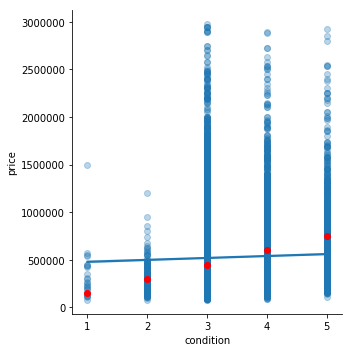

In [118]:
sns.lmplot(x='condition', y='price', data=df, scatter_kws={"alpha":0.3})
plt.scatter(x=np.arange(1, 6), y=np.arange(1, 6)*150100, c='r')
# plt.plot(x=np.arange(1, 6), y=np.arange(1, 6)*151400, c='r')
plt.show()

# how do I treat it as a category? 

In [125]:
df_cat = pd.get_dummies(df, columns=['condition'], drop_first=True)
df_cat

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,condition3,condition_2,condition_3,condition_4,condition_5
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,7,...,98125,47.7210,-122.319,1690,7639,1,0,1,0,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,6,...,98028,47.7379,-122.233,2720,8062,1,0,1,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,7,...,98136,47.5208,-122.393,1360,5000,1,0,0,0,1
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,8,...,98074,47.6168,-122.045,1800,7503,1,0,1,0,0
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,11,...,98053,47.6561,-122.005,4760,101930,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,8,...,98116,47.5773,-122.409,1330,1265,1,0,1,0,0
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,8,...,98103,47.6993,-122.346,1530,1509,1,0,1,0,0
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,8,...,98146,47.5107,-122.362,1830,7200,1,0,1,0,0
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,7,...,98144,47.5944,-122.299,1020,2007,1,0,1,0,0


In [126]:
condition_cols = [col for col in df_cat.columns if 'condition_' in col]
condition_cols

['condition_2', 'condition_3', 'condition_4', 'condition_5']

In [127]:
X = df_cat[condition_cols]
y = df_cat['price']

In [128]:
ols = sm.OLS(y, X)
res = ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.736
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                          1.326e+04
Date:                Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                        14:00:07   Log-Likelihood:                     -2.6827e+05
No. Observations:               19047   AIC:                                  5.365e+05
Df Residuals:                   19043   BIC:                                  5.366e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
condition_2  3.179e+05   2.58e+04     12.334      0.000    2.67e+05    3.68e+05
condition_3  5.297e+05   2847.092    186.041      0.000    5.24e+05    5.35e+05
condition_4  5.084e+05   4475.770    113.584      0.000       5e+05    5.17e+05
condition_5  6.014e+05   8201.961     73.328      0.000    5.85e+05    6.18e+05
==============================================================================
Omnibus:                    10184.034   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90160.379
Skew:                           2.436   Prob(JB):                         0.00
Kurtosis:                      12.480   Cond. No.                         9.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# get data
# which model to send my data to
# evaluate data with specific model 